[View in Colaboratory](https://colab.research.google.com/github/blasillo/CursoVyADatos/blob/master/arbolesdecision.ipynb)

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Vamos a usar los siguientes datos bidimensionales con cuatro etiquetas.

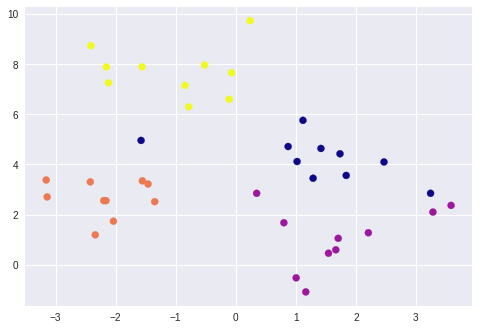

In [33]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=40, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='plasma');

Creamos un clasificador que es una árbol de decisión, usando la librería Scikit-Learn y el estimador DecisionTreeClassifier.

In [0]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier().fit(X, y)


Ahora una función auxiliar que muestre la salida obternida

In [0]:
def visualiza_clasificador (modelo, X, y, ax=None, cmap='plasma'):
    ax = ax or plt.gca()
    
    # puntos usados para entrenamiento
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # ajustar el estimador
    modelo.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # diagrama de colores con el resultado
    n_classes = len(np.unique(y))
    contornos = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

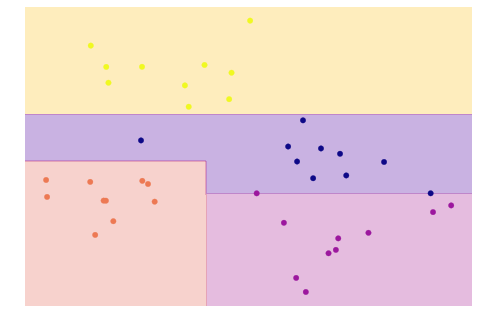

In [36]:
visualiza_clasificador(arbol, X, y)

In [23]:
!pip install pydotplus
!pip install GraphViz

In [0]:
%%bash
/usr/bin/yes | apt-get install graphviz
pip install --upgrade graphviz
/usr/bin/yes | pip uninstall pyparsing
pip install -Iv https://pypi.python.org/packages/source/p/pyparsing/pyparsing-1.5.7.tar.gz
pip install --upgrade pydot

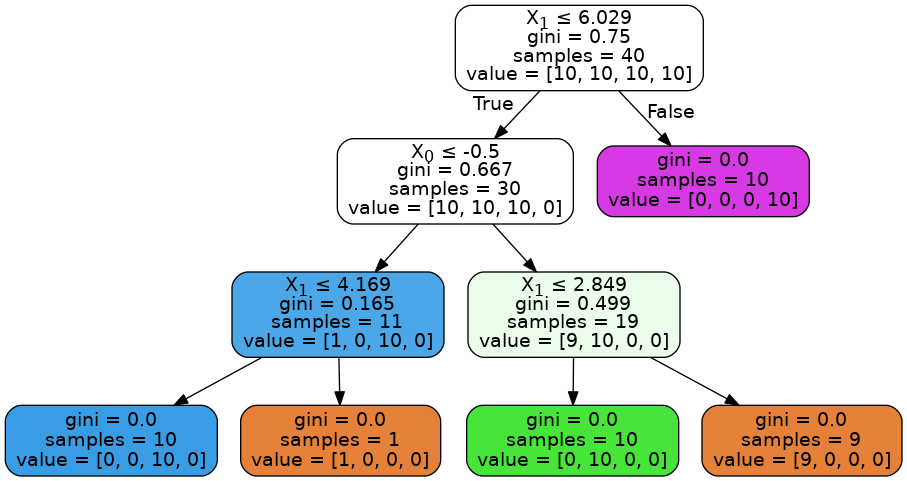

In [37]:
#visualiza árbol
from sklearn import tree
from IPython.display import Image 
from sklearn.externals.six import StringIO 
import pydotplus


dot_data = StringIO()

export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png())